# Census Income Project:
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). **The prediction task is to determine whether a person makes over $50K a year.**

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

* A single cell estimate of the population 16+ for each state.

* Controls for Hispanic Origin by age and sex.

* Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



**To download the dataset, use the link given below.**

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


### Importing necessary Libraries:

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset:

In [2]:
# Reading the csv file from dataset
df = pd.read_csv(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


So here we can see The dataset contains the details of Census bureau database (1994). 
* This dataset is comprised of 32560 rows and 15 columns including one target varibale i.e. 'Income'. where we need to predict whether a person makes over $50K a year or not.
* There are two unique values in the target column <=50K and >50K. We can say that whether the person has annual income <=50K or >50K.
* The target variable that is 'Income' has two classes of data, hence this is a classification data. We will look more into the dataset in the EDA part

##  Exploratory Data Analysis(EDA) & Feature Engineering:

In [3]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


So here we can see the dataset contains different features with different data types.
* There are two types of data namely object type(9 columns) and int64 data type(6 columns).
* We will take care of the object datatype using encoding techniques later.

In [4]:
# checking the null values in the dataframe
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

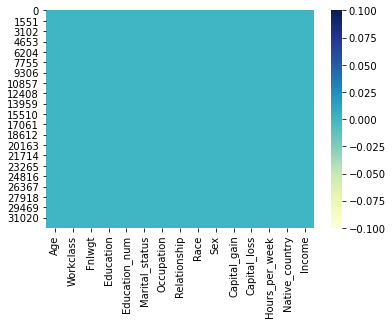

In [5]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="YlGnBu")

* We can clearly see our dataset has no null values.
* We saw in our dataset we do not have Nan present but we do have '?' in some columns we need to fill these columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


from the above cell we can check the no. of unique values present in each columns.

In [8]:
#Checking the value counts of each of the columns
for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
___________________________________""")

 Column 'Age' :
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
___________________________________
 Column 'Workclass' :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
___________________________________
 Column 'Fnlwgt' :
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
___________________________________
 Column 'Education' :
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 P

**From this analysis we see the following points:**
* We have 29849, zero value in capital gain and 31041, zero values in capital loss, which is 90% of the data, so we can consider dropping them.
* Also we have ? value in workclass, occupation and Native_country, so we need to impute this value.

In [9]:
#dropping capital gains and capital loss
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [10]:
# imputing the null values by most occuring value as these are categorical column
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [11]:
# ReChecking the value counts of each of the columns which are affected:
d = ['Workclass','Occupation','Native_country']
for i in d:
    print(f""" Column '{i}' :
{df[i].value_counts()}
___________________________________""")

 Column 'Workclass' :
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
___________________________________
 Column 'Occupation' :
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
___________________________________
 Column 'Native_country' :
 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico    

* We have now filled the data.

* **In the dataset, we can see that there are multiple classes. Grouping releted classes to one class and create new classes for easy analysis and visualization.**

In [12]:
# for column: "Workclass" 

df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [13]:
df["Workclass"].value_counts()

 Pvt-sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [14]:
# for column: "Education" 

df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [15]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

In [16]:
# for column: "Marital_status" 

df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [17]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [18]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


### Statistical Analysis of the DataSet:

In [19]:
df.describe() #numerical columns only

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


* This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

#### Checking the 'categorical' and 'numerical columns':

In [20]:
# checking for categorical and numerical columns

categorical_col=[]
numerical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        
print(f"""* Categorical Columns: {categorical_col}
-----------------------------------------------------------------------------------------------------------------------
* Numerical Columns: {numerical_col}""")

* Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
-----------------------------------------------------------------------------------------------------------------------
* Numerical Columns: ['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


## Data Visualization.

### 1. Univariate Analysis:
* **a) Categorical columns**

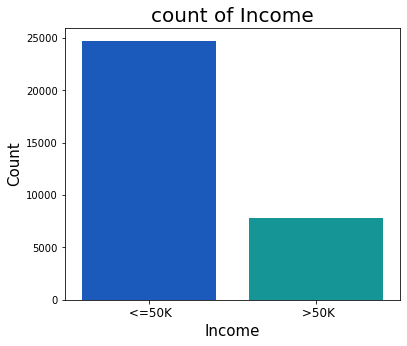

In [21]:
#Visualize the whether the income is above 50K or not
plt.figure(figsize=(6,5))
sns.countplot(df["Income"],palette = 'winter')

plt.title('count of Income',fontsize=20)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* We see that there are 2 classes in target variable, and the dataset is imbalanced. We will have to balance the datset for modelling.

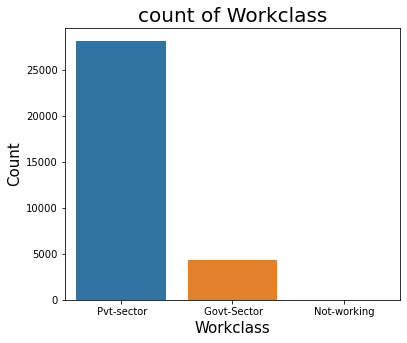

In [22]:
#Visualizing the column workclass

plt.figure(figsize=(6,5))
sns.countplot(df['Workclass'])

plt.title('count of Workclass',fontsize=20)
plt.xlabel('Workclass',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=10) #,rotation=30)

plt.show()

* Here we can see that, the population is max working in the private sector, followed by govt sector and none unemployed.

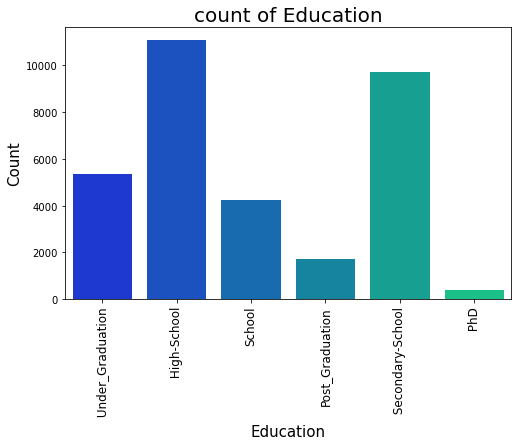

In [23]:
#Visualizing the Education column
plt.figure(figsize=(8,5))
sns.countplot(df['Education'],palette = 'winter')

plt.title('count of Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

plt.show()

* Here we can see that the max population has the education level at high school, followed by secondary school.
* there are very few people who has done phD and post_graduation.

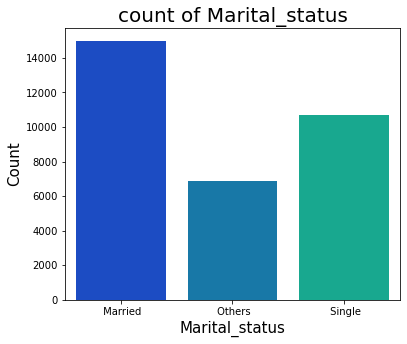

In [24]:
#Visualizing the Marital_status
plt.figure(figsize=(6,5))
sns.countplot(df['Marital_status'],palette = 'winter')

plt.title('count of Marital_status',fontsize=20)
plt.xlabel('Marital_status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=10) #,rotation=30)

plt.show()

* Here we can see that the population of married people are higher.

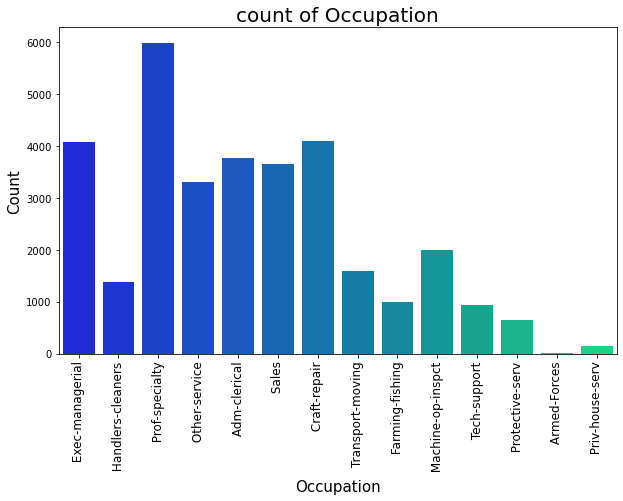

In [25]:
# Visualize the count of Occupation of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],palette = 'winter')

plt.title('count of Occupation',fontsize=20)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

plt.show()

* The people who are in the position of Prof-speciality have highest count followed by craft-repair,Exec-managerial.
* And the people in the position Armed-Forces and priv-house-serv have very least counts.

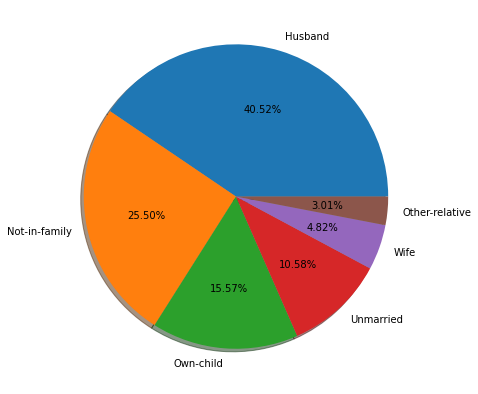

In [26]:
# Visualize the count of Relationship of the people
labels='Husband','Not-in-family','Own-child', 'Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

* The count is high in the Husband category which has around 40% of count and other relative has very least count around 3%.

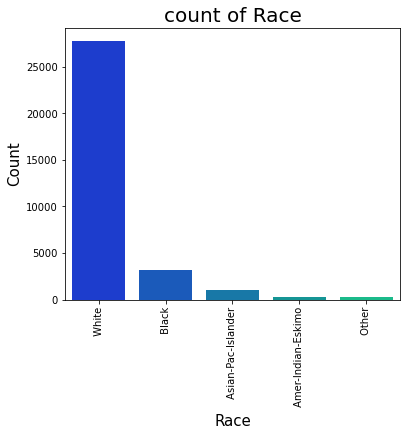

In [27]:
# Visualize the count of Race of the people

plt.figure(figsize=(6,5))
sns.countplot(df['Race'],palette = 'winter')

plt.title('count of Race',fontsize=20)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=10,rotation=90)

plt.show()

* White family groups have high count which id more than 80% and Other race have least count.

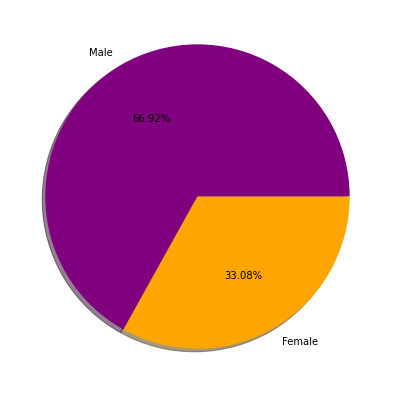

In [28]:
# Visualize the count of Sex group of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(7,7))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

* The count of Male is high and has around 66% and only 33% of females are there.

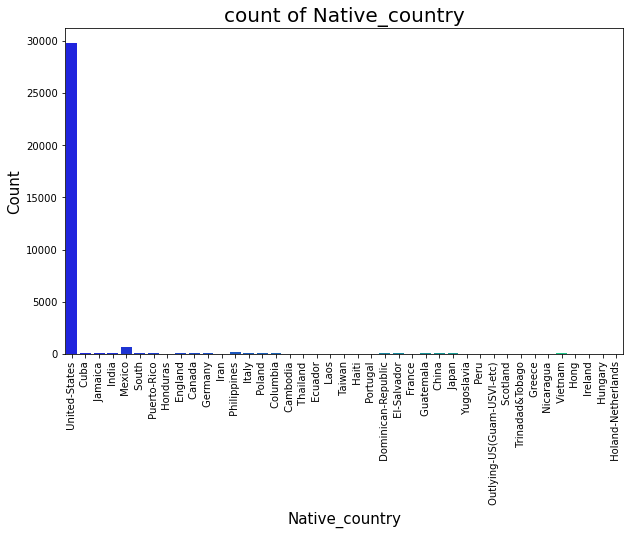

In [29]:
# Visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"],palette = 'winter')

plt.title('count of Native_country',fontsize=20)
plt.xlabel('Native_country',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=10,rotation=90)

plt.show()

* The United States country has highest count of around 29K and other countries have very less counts.

* **b) Numerical columns:**

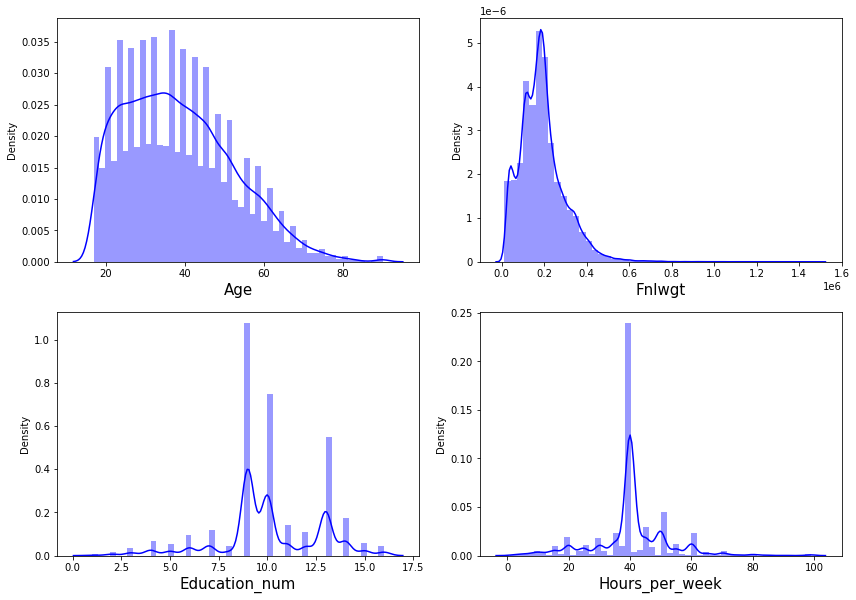

In [30]:
# Checking how the data is distributed:

plt.figure(figsize=(12,12), facecolor='white')
plotnumber=1
for columns in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[columns], color='b')
        plt.xlabel(columns, fontsize=15)
    plotnumber+=1
plt.tight_layout()

* We can clearly identify that the data in the dataset is not normal. We have 'Age' which is skewed right, Final weight is also skewed right, education is scattered and hours is also scattered with no skewness.

### 2. Bivariate Analysis (Checking relation between features and label):

In [31]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

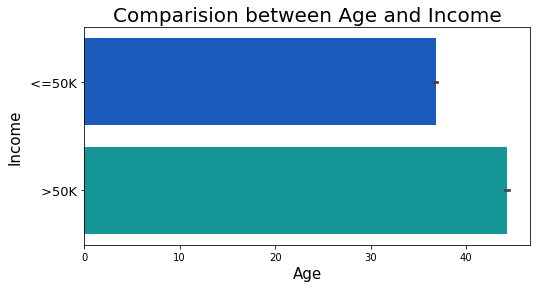

In [32]:
#Checking the relation between target Income and variable Age
plt.figure(figsize=[8,4])
sns.barplot(df['Age'],df["Income"],palette = 'winter')

plt.title('Comparision between Age and Income',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.yticks(fontsize=13)

plt.show()

* The older age group has income more then 50K.

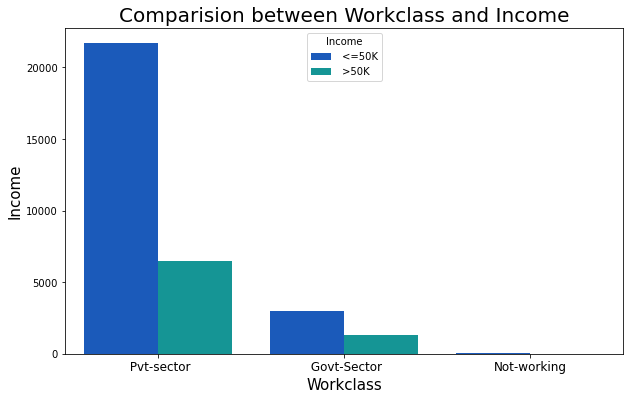

In [33]:
#Checking the relation between target Income and variable Workclass
plt.figure(figsize=(10,6))
sns.countplot(df["Workclass"],hue=df["Income"], palette='winter')

plt.title("Comparision between Workclass and Income",fontsize=20)
plt.xlabel('Workclass',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* The people who are working in the private sectors have the income <=50K and the only few of the people in the same sector have income >50K. Also the people who never worked they don't have the income.

<Figure size 864x576 with 0 Axes>

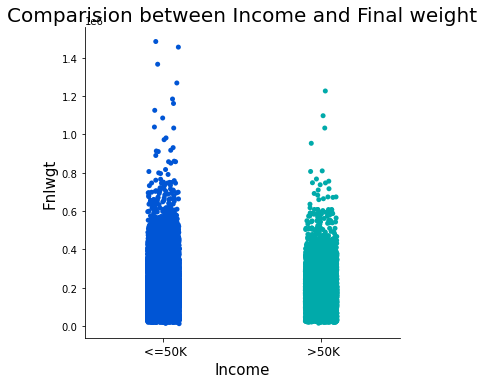

In [43]:
# Visualizing the Final weight with income
plt.figure(figsize=(12,8))
sns.catplot(df['Income'],df['Fnlwgt'], data=df,palette='winter')

plt.title('Comparision between Income and Final weight',fontsize=20)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Fnlwgt',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* There is no significant relation between final weight and income of the people.

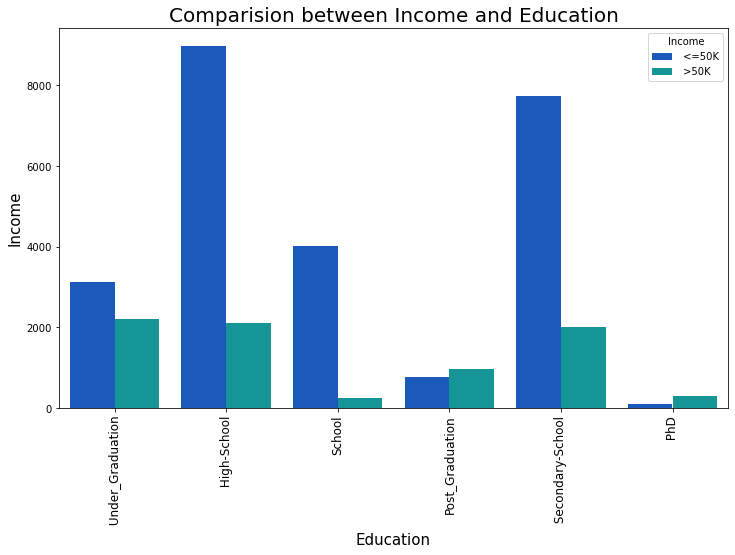

In [49]:
# Visualizing the relation between Education and Income
plt.figure(figsize=(12,7))
sns.countplot(df["Education"],hue=df["Income"],palette='winter')

plt.title('Comparision between Income and Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

plt.show()

* The people who completed theie high school have income <=50K followed by the people who done their Secondary School. Also the people who done their Graduation they are earning more income that is >50K.

<Figure size 720x432 with 0 Axes>

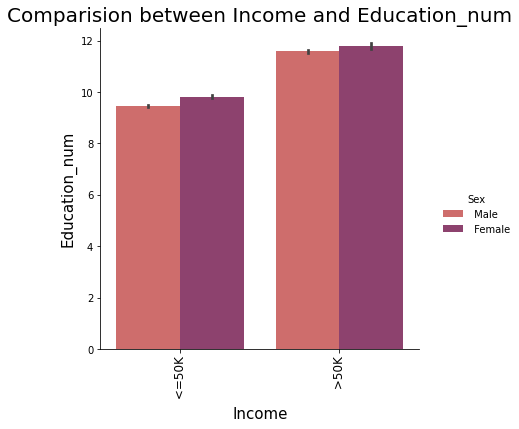

In [51]:
# Visualizing the number of education_num with income
plt.figure(figsize=(10,6))
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="flare")

plt.title('Comparision between Income and Education_num',fontsize=20)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Education_num',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

plt.show()

* The Income is more than 50K for the people having high education number. Here both gender have the income more than 50K.

<Figure size 72x216 with 0 Axes>

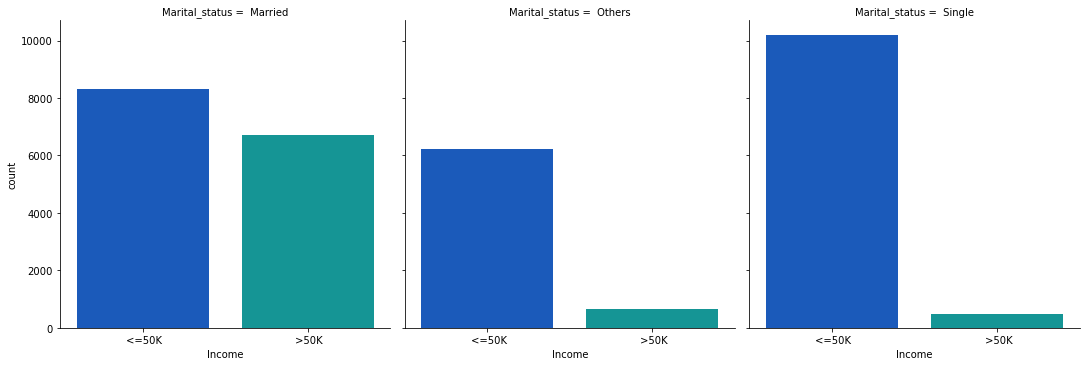

In [56]:
# Visualizing the relation between Marital status and Income
plt.figure(figsize=(1,3))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="winter")
plt.show()

Here we can clearly see,
* Married population they have the income >50K compare to others.
* Most of Single population have the income <=50k. 

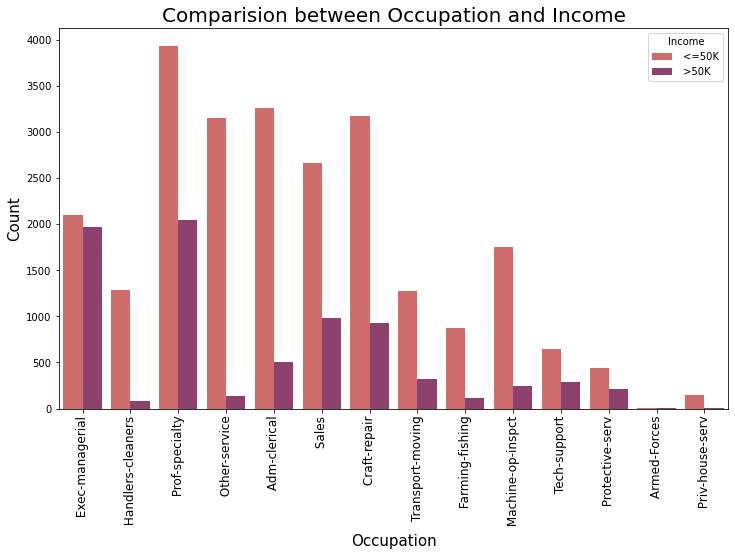

In [59]:
# Visualizing the relation between Occupation and Income
plt.figure(figsize=(12,7))
sns.countplot(df["Occupation"],hue=df["Income"],palette="flare" )

plt.title('Comparision between Occupation and Income',fontsize=20)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12,rotation=90)


plt.show()

* Population belonging to Prof-speciality and Exce-managerial have the income more than 50K.

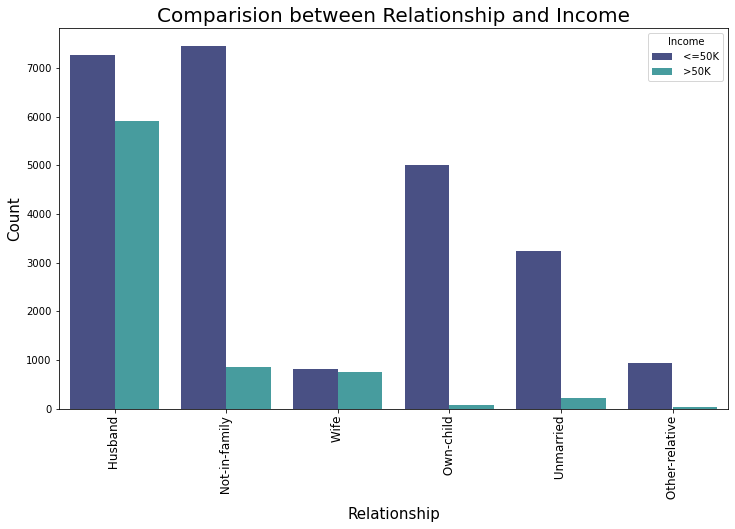

In [63]:
# Visualizing the relation between Relationship and Income
plt.figure(figsize=(12,7))
sns.countplot(df["Relationship"],hue=df["Income"],palette="mako" )

plt.title('Comparision between Relationship and Income',fontsize=20)
plt.xlabel('Relationship',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12,rotation=90)


plt.show()

* Population in relationship as Husband has relatively higher income.
* Most of the population which is Not-in-family has income <= 50k.

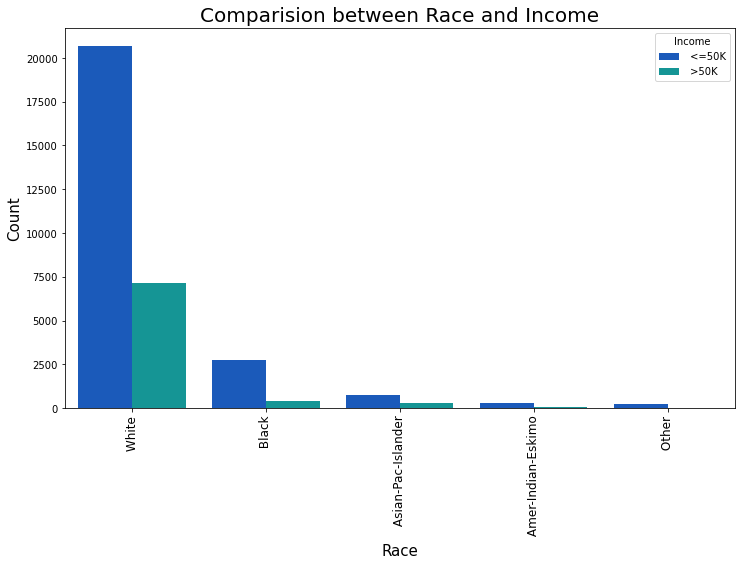

In [64]:
# Visualizing the relation between Race and Income
plt.figure(figsize=(12,7))
sns.countplot(df["Race"],hue=df["Income"],palette="winter" )

plt.title('Comparision between Race and Income',fontsize=20)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12,rotation=90)


plt.show()

* The white family groups have high income >50K compare ro other racial groups.

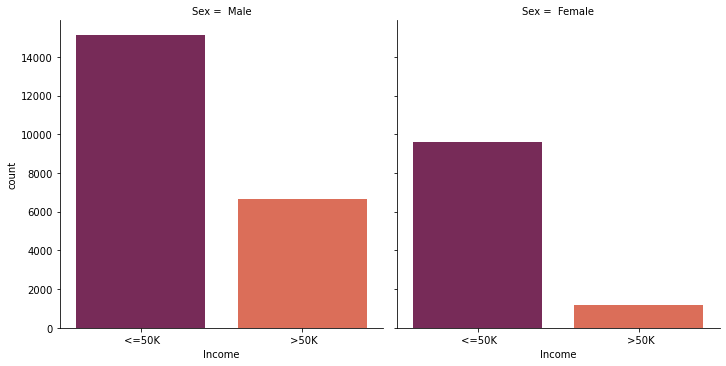

In [65]:
# Visualizing the relation between Income and Sex groups
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="rocket")
plt.show()

* The income of Male is above 50K compared to the female.

<Figure size 864x504 with 0 Axes>

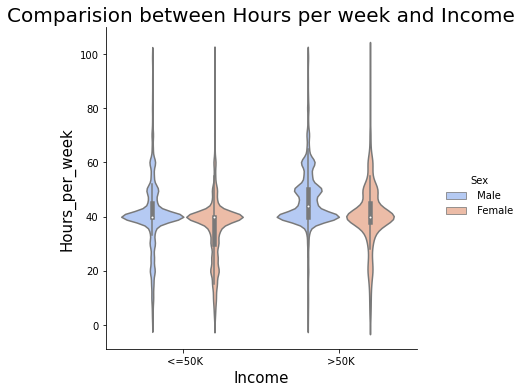

In [78]:
# Visualizing the number of Hours per week with income
plt.figure(figsize=(12,7))
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='violin',hue="Sex",palette="coolwarm")

plt.title('Comparision between Hours per week and Income',fontsize=20)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Hours_per_week',fontsize=15)

plt.show()

* This shows how the income is related to the hours per week. The income is >50K when the Hours is high for both male and female.

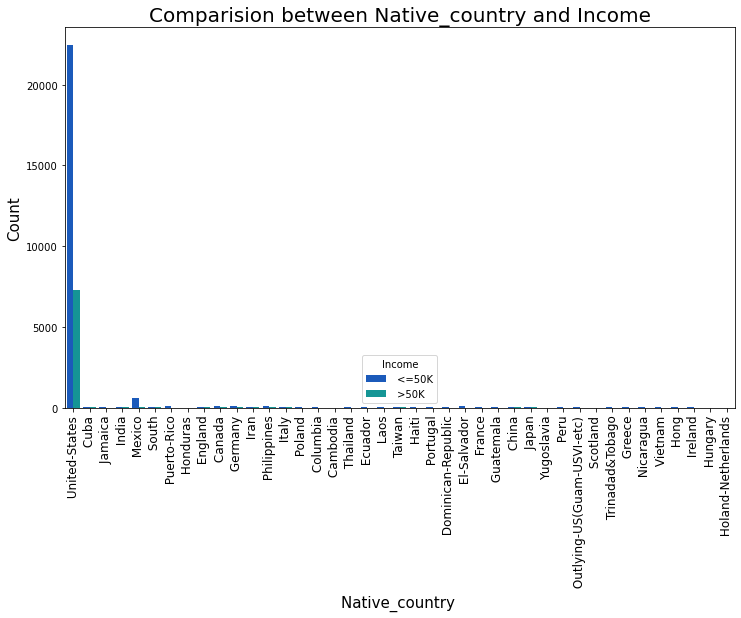

In [80]:
# Visualizing the relation between Native_country and Income
plt.figure(figsize=(12,7))
sns.countplot(df["Native_country"],hue=df["Income"],palette="winter" )

plt.title('Comparision between Native_country and Income',fontsize=20)
plt.xlabel('Native_country ',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12,rotation=90)


plt.show()

* Clearly United States earning more income compared to all the other countries.

### Checking for Outliers:

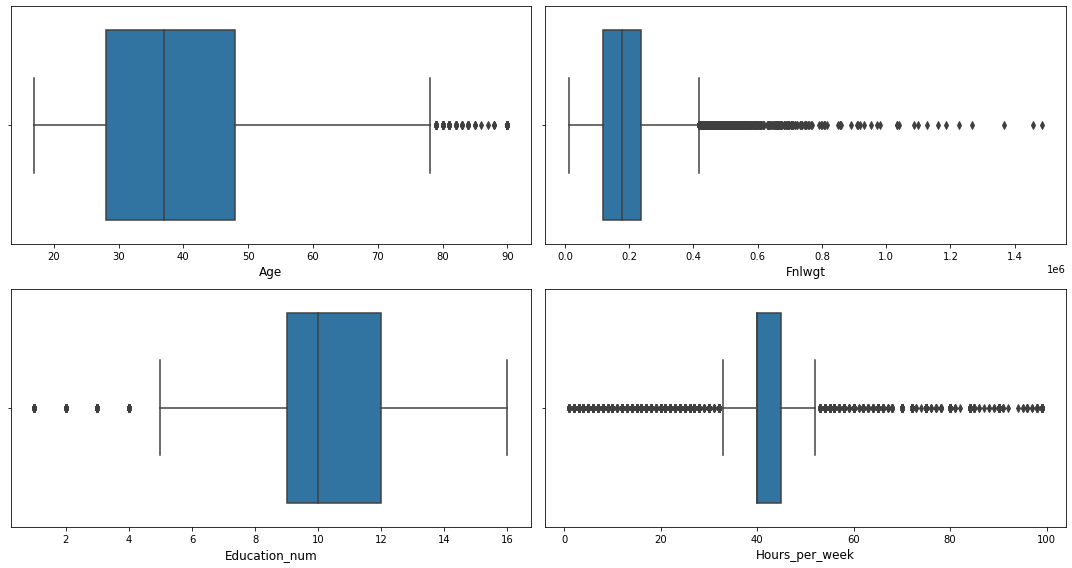

In [84]:
# Identifying the outliers using boxplot

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

* The outliers present in all the columns we will remove it using Zscore method.

## Removing outliers:
### 1. ZSCORE method:

In [85]:
numerical_col

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']

In [91]:
features = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]
z=np.abs(zscore(features))

z

array([[0.83709708, 1.0087417 , 1.13477863, 2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 0.03542999]])

In [92]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


* SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [93]:
df.shape

(32560, 13)

* Before removing outliers we had 32560 rows and 13 columns in the dataset.

In [95]:
new_df.shape

(31461, 13)

* After removing the outliers we have 31461 rows and 13 columns.

In [96]:
# checking the data loss
data_loss = (32560-31461)/32560*100
print(f"""data_loss : {data_loss} %""")

data_loss : 3.3753071253071254 %


* Here We are losing only 6% of data by removing outliers using zscore. Then remove the outliers and check data loss % by using IQR method.

### 2. IQR METHOD(Inter Quantile Range):

In [97]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [98]:
df1.shape

(21950, 13)

* So we can notice here that after using IQR method data have 21950 rows and 13 columns.

In [99]:
# checking the data loss
data_loss = (32560-21950)/32560*100
print(f"""data_loss : {data_loss} %""")

data_loss : 32.58599508599509 %


* We can observe here that using IQR method we are losing 32.5 % of data which is huge. so considering zscore method for better result.

### Checking the skewness of the dataset

In [102]:
new_df.skew().sort_values()

Hours_per_week   -0.341724
Education_num    -0.159752
Age               0.472279
Fnlwgt            0.634828
dtype: float64

* There is skewness only in the Final Weight column (more than +/-0.5 skewness).

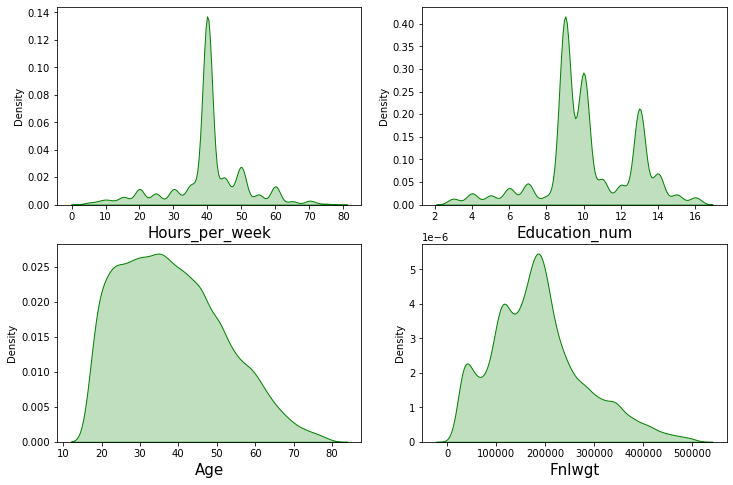

In [108]:
# checking how the data has been distributed in each columns.

x = new_df[['Hours_per_week','Education_num','Age','Fnlwgt']]
plt.figure(figsize=(12,8), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

* We can clearly identify that the data in the dataset is not normal. We have 'Age' which is skewed right, Final weight is also skewed right, education_num is scattered and hours is also scattered with no skewness.

### Removig the skewness

In [111]:
new_df["Fnlwgt"] = np.cbrt(df["Fnlwgt"])

In [112]:
new_df["Age"] = np.cbrt(df["Age"])

In [113]:
new_df.skew().sort_values()

Fnlwgt           -0.376609
Hours_per_week   -0.341724
Education_num    -0.159752
Age               0.047114
dtype: float64

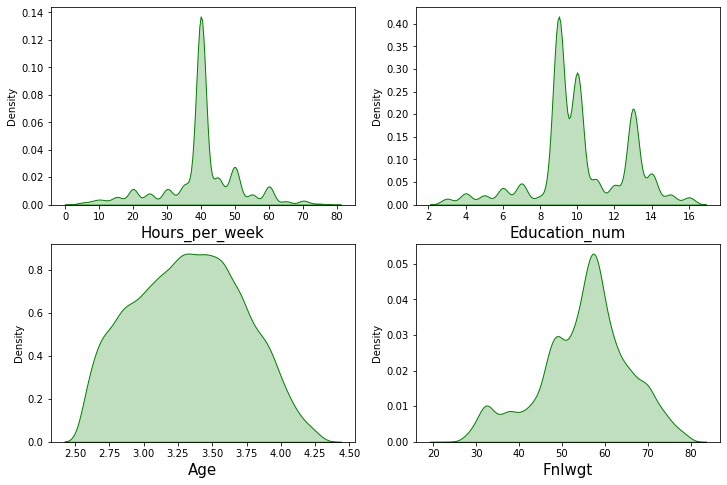

In [114]:
# Rechecking how the data has been distributed in each columns.

x = new_df[['Hours_per_week','Education_num','Age','Fnlwgt']]
plt.figure(figsize=(12,8), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(x[column],color='b',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

* The data looks normalized then before

### Encoding the categorical columns using Label Encoding:

In [115]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation',
                   'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [116]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,3,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,3,0,9,5,2,0,4,0
4,1,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,2,0,12,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


* Categorical columns has been encoded and ready for modelling.

### Checking Correlation:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Workclass'),
  Text(2.5, 0, 'Fnlwgt'),
  Text(3.5, 0, 'Education'),
  Text(4.5, 0, 'Education_num'),
  Text(5.5, 0, 'Marital_status'),
  Text(6.5, 0, 'Occupation'),
  Text(7.5, 0, 'Relationship'),
  Text(8.5, 0, 'Race'),
  Text(9.5, 0, 'Sex'),
  Text(10.5, 0, 'Hours_per_week'),
  Text(11.5, 0, 'Native_country'),
  Text(12.5, 0, 'Income')])

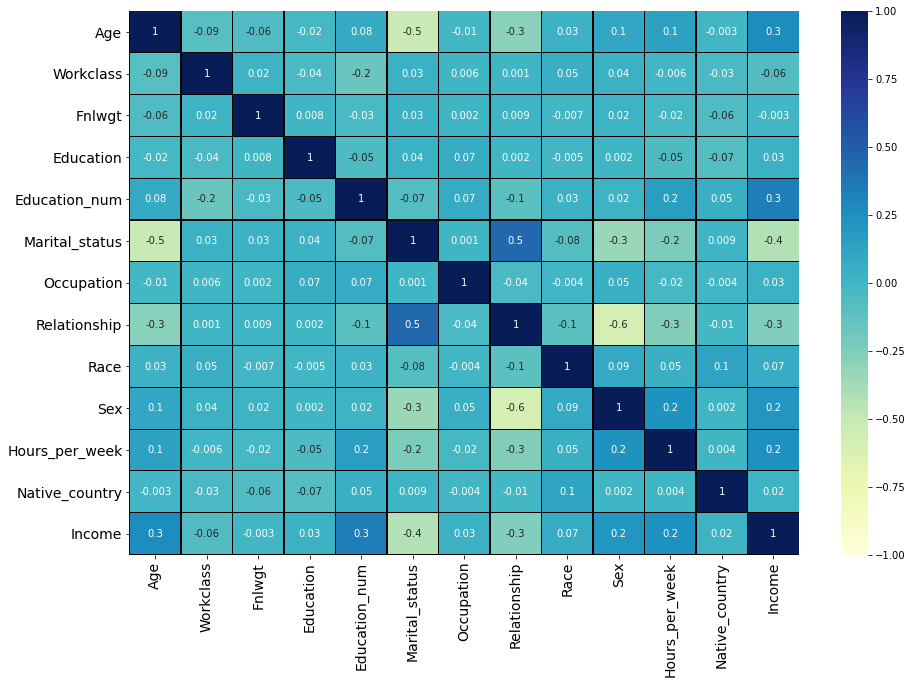

In [121]:
corr=new_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0,fontsize = 14)
plt.xticks(fontsize = 14)

In [122]:
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.270522
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

* It is visible from the heatmap and the table, that the relation of features vs target and features vs features. Also the positive and negative relationship can be seen.

### Seperating the features and target:

In [123]:
x = new_df.drop("Income", axis=1)
y = new_df["Income"]

### Feature Scaling using Standard Scalarization:

In [124]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.912489,0.392103,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,0.091163,0.392103,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.096755,0.392103,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.738655,0.392103,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,0.015284,0.392103,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.831967,0.392103,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.239018,0.392103,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.388991,0.392103,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.336817,0.392103,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


### Oversampling (SMOTE):

* As we have seen earlier that the target variable is imbalanced, lets balance it using SMOTE:

In [125]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [126]:
y.value_counts()

1    23853
0    23853
Name: Income, dtype: int64

In [127]:
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,3.684031,1,43.675121,3,13,0,3,0,4,1,13,38,0
1,3.361975,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,3.756286,1,61.685627,5,7,0,5,0,2,1,40,38,0
3,3.036589,1,69.686283,3,13,0,9,5,2,0,40,4,0
4,3.332222,1,65.776255,4,14,0,3,5,4,0,40,38,0


* Now our Data is Balanced and ready for Modeling.

# Modelling:

### Finding best random state:

In [129]:
maxAccu=0
maxRS=0

for i in range(1,300):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.25, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8866437494759789  on Random_state  86


* We got an accuracy score of 88% at a random state of 86.

### Creating Train_Test_Split:

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

## 1. Logistic Regression:

In [134]:
log = LogisticRegression()
log.fit(x_train,y_train)

# Prediction
predlog = log.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predlog)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predlog)}''')
print(classification_report(y_test,predlog))

Accuracy: 79.96143204494005%
Confusion Matrix: 
[[4544 1396]
 [ 994 4993]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      5940
           1       0.78      0.83      0.81      5987

    accuracy                           0.80     11927
   macro avg       0.80      0.80      0.80     11927
weighted avg       0.80      0.80      0.80     11927



* **We got an accuracy score of almost 80% with Logistic Regression.**

## 2. Decission Tree Classifier:

In [136]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Prediction
preddtc = dtc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, preddtc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, preddtc)}''')
print(classification_report(y_test,preddtc))

Accuracy: 83.26486123920517%
Confusion Matrix:
[[4907 1033]
 [ 963 5024]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      5940
           1       0.83      0.84      0.83      5987

    accuracy                           0.83     11927
   macro avg       0.83      0.83      0.83     11927
weighted avg       0.83      0.83      0.83     11927



* **We got an accuracy score of 83% with Decission Tree Classifier model.**

## 3. Random Forest Classifier:

In [137]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

# Prediction
predrfc=rfc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predrfc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predrfc)}''')
print(classification_report(y_test,predrfc))

Accuracy: 88.46315083424163%
Confusion Matrix:
[[5148  792]
 [ 584 5403]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5940
           1       0.87      0.90      0.89      5987

    accuracy                           0.88     11927
   macro avg       0.89      0.88      0.88     11927
weighted avg       0.89      0.88      0.88     11927



* **We got an accuracy score of 88% with Random Forest Classifier model.**

## 4. KNNeighbors Classifier:

In [138]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predknn)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predknn)}''')
print(classification_report(y_test,predknn))

Accuracy: 84.39674687683407%
Confusion Matrix:
[[4552 1388]
 [ 473 5514]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      5940
           1       0.80      0.92      0.86      5987

    accuracy                           0.84     11927
   macro avg       0.85      0.84      0.84     11927
weighted avg       0.85      0.84      0.84     11927



* **We got an accuracy score of 84% with KNNeighbors Classifier model.**

## 5. Xtreme Gradient Boosting Classifier:

In [139]:
# Checking accuracy for XGBClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

#Prediction
predxgb=xgb.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predxgb)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predxgb)}''')
print(classification_report(y_test,predxgb))

[15:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 88.7566026662195%
Confusion Matrix:
[[5251  689]
 [ 652 5335]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5940
           1       0.89      0.89      0.89      5987

    accuracy                           0.89     11927
   macro avg       0.89      0.89      0.89     11927
weighted avg       0.89      0.89      0.89     11927



* **We got an accuracy score of 88.7% with Xtreme Gradient Boosting Classifier model.**

# Checking the Cross Validation Score:

In [143]:
# 1. cv score for Logistic Regression Classifier
print(cross_val_score(log,x,y,cv=5).mean()*100,"%")

79.56862099918868 %


In [144]:
# 2. cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100,"%")

83.06101845841279 %


In [145]:
# 3. cv score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean()*100,"%")

88.11903666052133 %


In [146]:
# 4. cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean()*100,"%")

84.77134798726655 %


In [147]:
# 5. cv score for  XGBClassifier
print(cross_val_score(xgb,x,y,cv=5).mean()*100,"%")

[15:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Above are the cross validation score for all the models used:

* The difference between accuracy score and cross validation score of Gradient Boosting Classifier is very less compared to other models .

* So we can conclude that **'Random Forest Classifier' as our best fitting model.**

# Hyper Parameter Tuning:

In [148]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [149]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [150]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [151]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

* These are the best parameter values.

In [153]:
census = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 83.58346608535257 %


* The accuracy of the best model after tuning 83.50 %.

## Plotting ROC and Compare AUC for the best model:

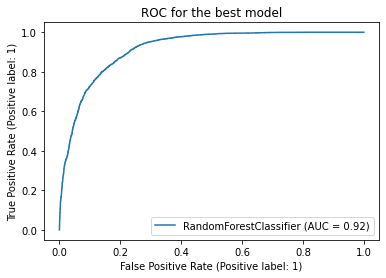

In [154]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving The Model:

In [155]:
import joblib
joblib.dump(census,"Census Income Project.pkl")

['Census Income Project.pkl']

## Conclusion :-

- The final Accuracy for the prediction of 'Income' (whether the person has annual income <=50K or >50K) of Census bureau database(1994) using Classification algorithm is = 83%